In [1]:
import sys

# Conda enviroment paths
sys.path.append('/home/vicente/anaconda3/envs/freecad-env/lib')
sys.path.append('/home/vicente/anaconda3/envs/freecad-env/Mod/Fem')

import ObjectsFem
import FreeCAD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [3]:
doc_name = 'hex_5500'

doc = FreeCAD.open(f'files/{doc_name}/{doc_name}_mech.FCStd')
res = doc.getObject('CCX_Results')
mesh = doc.getObject('MeshGmsh')
model = doc.getObject('Container')

In [36]:
nFace = 5
face_idx = mesh.FemMesh.getFacesByFace(model.Shape.Faces[nFace-1])
nodes_dict = dict(mesh.FemMesh.Nodes)

tmp = []
stress = []
von_mises_list = []
for idx_f in face_idx:
    nodes_idx = mesh.FemMesh.getElementNodes(idx_f) # 6 nodes, 4 faces
    nodes_coords = [nodes_dict[idx_n] for idx_n in nodes_idx]
    von_mises = np.mean([res.DisplacementLengths[idx_n] for idx_n in nodes_idx])
    tmp.append(nodes_coords)
    stress.append(von_mises)
    for idx_n in nodes_idx:
        von_mises_list.append(res.DisplacementLengths[idx_n])

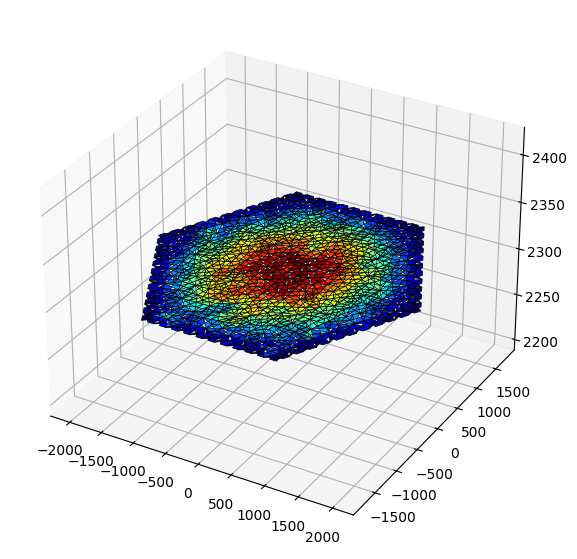

In [37]:
cmap = plt.get_cmap('jet')
norm = mcolors.Normalize(vmin=min(stress), vmax=max(stress))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

poly3d = Poly3DCollection(tmp, facecolors=cmap(norm(stress)), linewidths=.5, edgecolors='k')

ax.add_collection3d(poly3d)
plt.show()

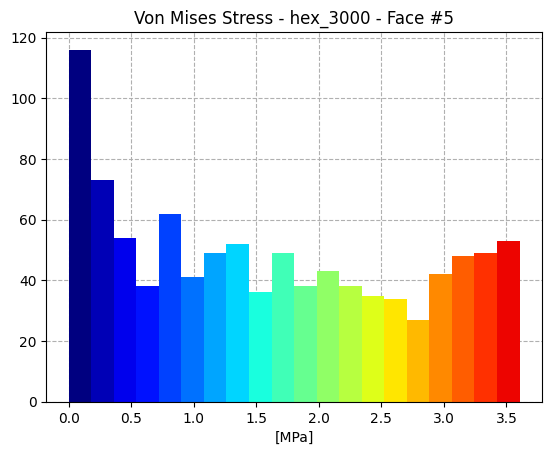

In [33]:
new_nodes = mesh.FemMesh.getNodesByFace(model.Shape.Faces[nFace-1])
new_stress = [res.DisplacementLengths[idx_n] for idx_n in new_nodes]

cnts, values, bars = plt.hist(new_stress, bins=20)
for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    bar.set_facecolor(cmap(i/len(values)))
plt.xlabel('[MPa]')
plt.title(f'Von Mises Stress - {doc_name} - Face #{nFace}')
plt.grid(ls='--')
#plt.yscale('log')
plt.gca().set_axisbelow(True)

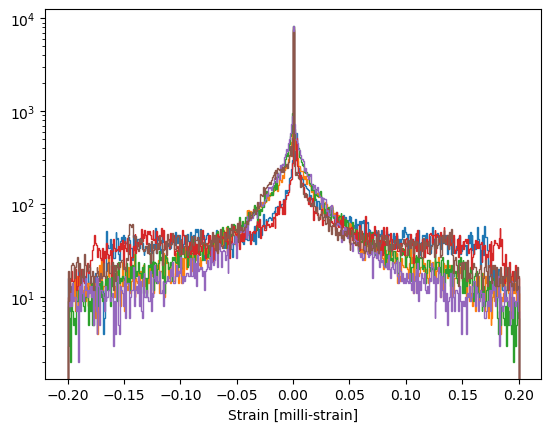

In [11]:
bins = np.linspace(-.2, .2, 500)



plt.hist(1e3*np.array(res.NodeStrainXX), histtype='step', bins=bins)
plt.hist(1e3*np.array(res.NodeStrainXY), histtype='step', bins=bins)
plt.hist(1e3*np.array(res.NodeStrainXZ), histtype='step', bins=bins)
plt.hist(1e3*np.array(res.NodeStrainYY), histtype='step', bins=bins)
plt.hist(1e3*np.array(res.NodeStrainYZ), histtype='step', bins=bins)
plt.hist(1e3*np.array(res.NodeStrainZZ), histtype='step', bins=bins)

plt.xlabel('Strain [milli-strain]')
plt.yscale('log')
plt.show()